In [1]:
###### Principal Components Analysis ######

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
matdat = loadmat ('/content/gdrive/MyDrive/Colab Notebooks/Data/MasterPython_CodeAndData/stateSpaceTrajectories/ALMdata.mat')

In [38]:
matdat

Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

In [39]:
# examine sizes of the variables
print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')

chanidx = chanidx.flatten()
print(chanidx.shape)

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186,)


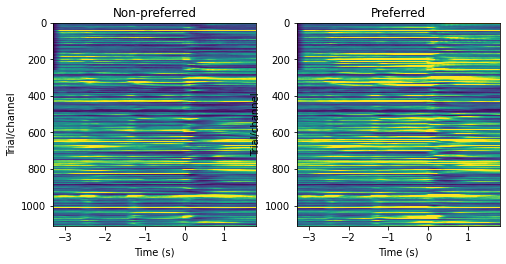

In [48]:
fig,ax = plt.subplots(1,2,figsize=(8,5))

# show images of the preferred and non-preferred datasets

ax[0].imshow(Nopr, extent = [t[0],t[-1],Nopr.shape[0],0],
              vmin=0, vmax=10)
ax[0].set_aspect(1/ax[0].get_data_ratio())
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Trial/channel')
ax[0].set_title('Non-preferred')

ax[1].imshow(Pref, extent = [t[0],t[-1],Pref.shape[0],0],
             vmin=0, vmax=10)
ax[1].set_aspect(1/ax[0].get_data_ratio())
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Trial/channel')
ax[1].set_title('Preferred')

plt.show()



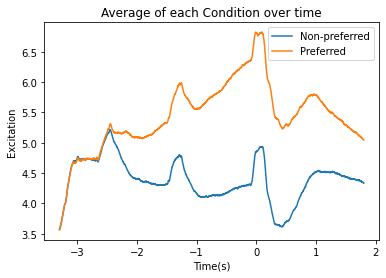

In [60]:
plt.plot(t,np.mean(Nopr,axis=0),label='Non-preferred')
plt.plot(t,np.mean(Pref,axis=0),label='Preferred')
plt.title('Average of each Condition over time')
plt.legend(["Non-preferred", "Preferred"])
plt.xlabel("Time(s)")
plt.ylabel('Excitation')
plt.show()

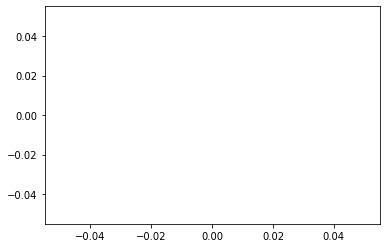

array([nan, nan, nan, ..., nan, nan, nan])

In [24]:
# Remove all NaN values
plt.plot(t,Nopr[380,:])

plt.show()

Nopr[380,:]



In [41]:
Nopr = Nopr[np.isfinite(Nopr[:,0]),:]


chanidx = chanidx[np.isfinite(Pref[:,0])]

Pref = Pref[np.isfinite(Pref[:,0]),:]

Pref.shape

(1111, 5101)